In [1]:
import os 
import cv2 
import glob 

import torch 
from torch.utils.data import random_split, Dataset, DataLoader


from visualization import visualize
from football_dataset import FootballDataset


0 1
1 3
2 5
3 7


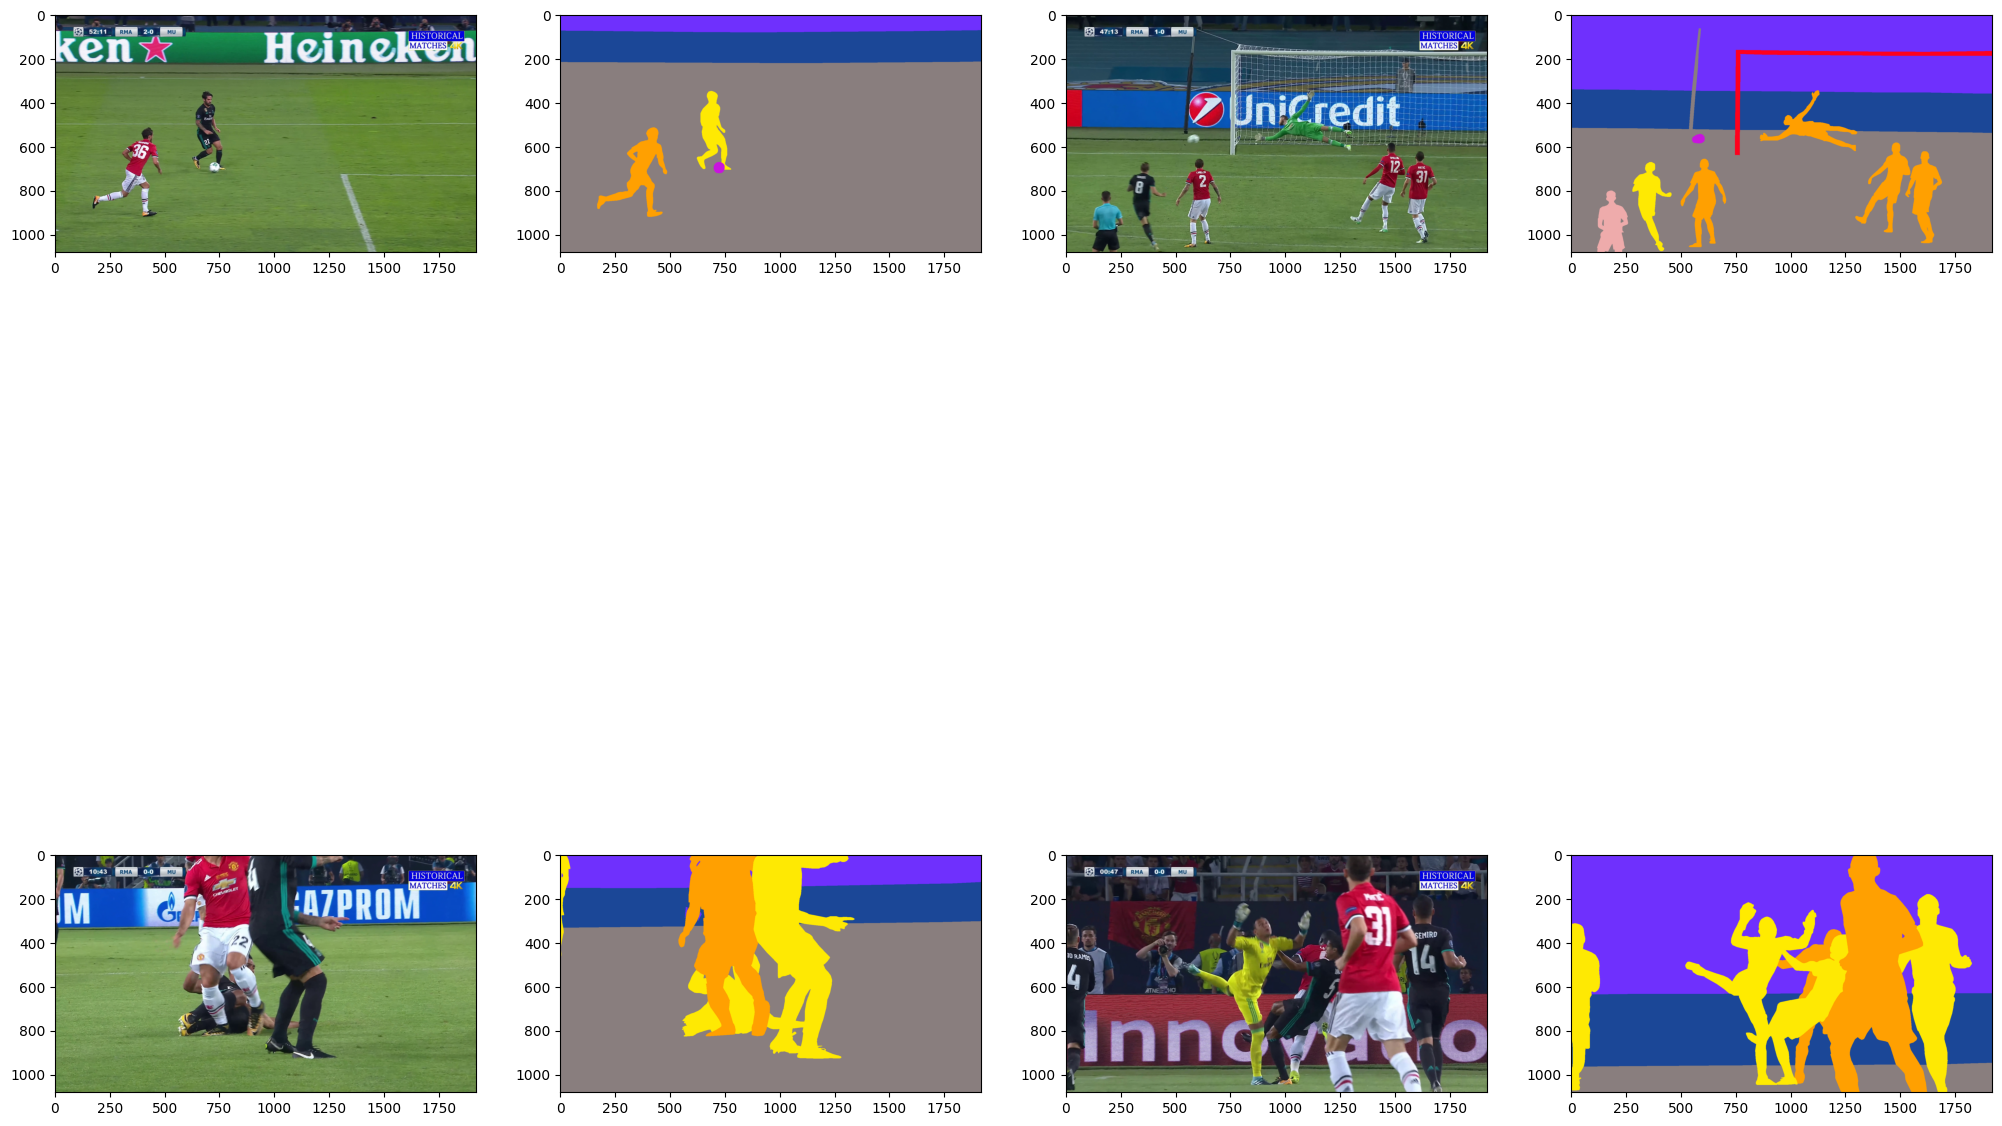

In [2]:
football_dataset = FootballDataset('./images')
train_valid_test_split_value = list(map(lambda x : int(x * len(football_dataset)), [0.8, 0.15, .05]))
train_set, valid_set, test_set = random_split(football_dataset, lengths=train_valid_test_split_value)
batch_size = 4 
# defining the dataloader
train_dataloader, valid_dataloader, test_dataloader = list(map(lambda x : DataLoader(x, batch_size=batch_size), [train_set, valid_set, test_set] ))
visualize(train_dataloader.dataset, no_of_images=8)

In [10]:
image, mask = train_dataloader.dataset[0]

In [1]:
import cv2 
import torch
import numpy as np 
oa = cv2.imread('./images/Frame 1  (1).jpg')
a = cv2.imread('./images/Frame 1  (1).jpg___fuse.png')

In [2]:
a.shape
a = torch.tensor(a).permute(2, 0, 1).unsqueeze(0)
a.shape

torch.Size([1, 3, 1080, 1920])

In [3]:
b = torch.argmax(a, dim=1)
b.shape

torch.Size([1, 1080, 1920])

In [4]:
c= b.squeeze(0).cpu().numpy()

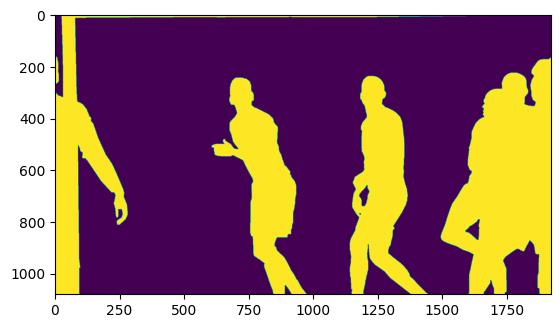

In [5]:
import matplotlib.pyplot as plt 
plt.imshow(c)

In [11]:
cv2.imshow('test',c * 0.50)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import albumentations as A 
t = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5)
])
aug = t(image=oa, mask=a)


In [3]:
img, msk = aug['image'], aug['mask']

In [4]:
norm = A.Normalize()(image = img, mask= np.expand_dims(msk, 0))

In [5]:
np.unique(norm['mask'].reshape(-1, 3), axis=0)

array([[  0, 159, 255],
       [  1, 160, 255],
       [  3, 233, 254],
       [ 29,   0, 255],
       [151,  71,  27],
       [253,  48, 111]], dtype=uint8)

In [25]:
cmp_pxl = [  0, 159, 255]
g = np.zeros_like(norm['mask'])
g[norm['mask'] == cmp_pxl] += norm['mask'][norm['mask'] == cmp_pxl]
g = g.squeeze(0)
g.shape

(1080, 1920, 3)

In [3]:
import glob 
import numpy as np 
import cv2
def iteration_pred_image(path = None, columns = 5):
    image_path_list = glob.glob(path)
    
    v_stack = []
    for row in range(len(image_path_list)//columns):
        hstack = []
        for column in range(columns):
            hstack.append(
                cv2.imread(image_path_list[(row * columns )+ column])
            )
        print(len(hstack))
        v_stack.append(np.hstack(hstack))
    
    grid_image = np.vstack(v_stack)
    cv2.imwrite('test.jpg', grid_image)

iteration_pred_image('./runs/exp-augments-geometry/iteration-2/train_pred/*.jpg')


5
5
5
5
